# Galerkin Finite Element for the Helmholtz Equation on a Unit Bar

Solves the indefinite Helmhotlz equation $\frac{d^2 \, u}{dx^2} + k^2 u= f$ on the unit bar domain $\Omega=(0,1)$ supplied with the homogeneous Dirichlet boundary condition in both end points. 

## Import Packages

In [2]:
using LinearAlgebra
using SparseArrays
using Plots
using LaTeXStrings
using BenchmarkTools 

   ## One-Dimensional Finite Element Code

This version initialize the coefficient matrix as a sparse matrix and assembles the matrix by a single for-loop. The double for-loop over the nodes of the element is removed.

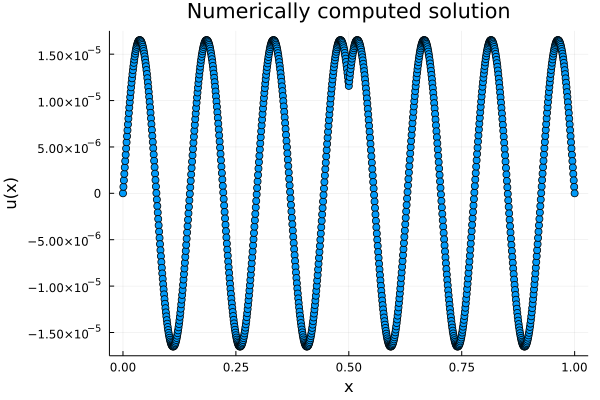

In [5]:
#..set the wave number (in [1/m]) and its square (in [1/m^2]) 
kwav = 30; 
kwav2 = kwav*kwav; 

#..Construct an uniform mesh with N elements and mesh size h=1/N
#..Vector x holds the mesh points 
N = 1000; Np1 = N+1; h = 1/N; h2=h*h; 
x = Vector(0:h:1); 

#..Mesh with edges and points
#..edges: numelem long list containing local-to-global mapping or connectivity information of each element 
#..points: numelem long list containing left and right node of each element
#..both points and edges are stored as list that are iterable 
edges = collect( [i, i+1] for i in 1:length(x)-1); 
points = collect( [x[i], x[i+1]] for i in 1:length(x)-1) 

#..Set the inline source function and the value of alpha 
fsource(x) = (x==.5)

#..Define lisrt of local or element matrix and right-hand side vector using comprehension..
Sloc = collect([-1 1; 1 -1]*(1/(xr-xl)) for (xl,xr) in points);
Mloc = collect([1 0; 0 1]*(xr-xl) for (xl,xr) in points);
floc = collect([fsource(xl); fsource(xr)]*(xr-xl)/2 for (xl,xr) in points);

#..Initialize coefficient matrix and right-hand side vector to zero  
A = spzeros(length(x), length(x)); 
f = zeros(length(x), 1); 

#..Assemble coefficient matrix and right-hand side vector by loop over the elements 
for i=1:length(edges) A[edges[i], edges[i]] += (Sloc[i]+kwav2*Mloc[i]); end; 
for i=1:length(edges) f[edges[i]] += floc[i]; end; 

#..handle the boundary conditions in the matrix and right-hand side vector 
A[1,1] = 1; A[1,2] = 0; f[1] = 0; 
A[end,end] = 1; A[end,end-1] = 0; f[end] = 0; 

#..solve the linear system
u = A \ f; 

#..plot the solution  
p1=plot(x,u,shape=:circle,lw=2,legend=false)
xlabel!("x") 
ylabel!("u(x)")
title!("Numerically computed solution")

## Exercises

Extend above to diffusion-reaction (linear and non-linear), convection-diffusion (linear and non-linear), parabolic heat equation, hyperbolic wave propagation (time and frequency domain), second order elements and adaptive mesh refinement.  

## References

1. [wiki](https://en.wikipedia.org/wiki/Finite_element_method)
2. [Comsol Multiphysics](https://www.comsol.com/multiphysics/finite-element-method)
3. [sphinx-fem](http://hplgit.github.io/INF5620/doc/pub/sphinx-fem/)